## A.I. Assignment 4

## Learning Goals

By the end of this lab, you should be able to:
* Get familiar with tensors in pytorch
* Get familiar with the activation functions for ANN 
* Create a simple perceptron model with pytorch



## Common activation functions for ANN:

##### Sigmoid:

The sigmoid function is a popular choice for activation functions in neural networks. It has an $S-shaped$ curve:
$$f(x) = \frac{1}{1+e^{-x}}.$$

It has a number of appealing qualities:

1. *Nonlinearity*: Because the sigmoid function is nonlinear, it enables the neural network to simulate nonlinear interactions between inputs and outputs. A neural network would simply be a linear model without a nonlinear activation function like sigmoid, which would significantly restrict its capacity to describe complex relationships.

1. *Smoothness*: As the sigmoid function is differentiable and smooth, its derivative exist at every point. This is significant because it makes it possible for neural network training techniques based on gradients (such as backpropagation) to perform well.

1. *Boundedness*: The sigmoid function is bounded between 0 and 1, it means  its outputs can be interpreted as probabilities.  It is most useful in applications like binary classification, where the goal is to predict whether an input belongs to one of two classes.

1. *Monotonicity*: The sigmoid function is monotonic, which means that its outputs are always increasing or always decreasing with respect to its inputs. This makes it easy to interpret the effect of changes in input variables on the output of the network.

##### ReLU (Rectified Linear Unit):

The ReLU function is defined as $$f(x) = max(0, x).$$

It is a widely used activation function in deep learning due to its simplicity and effectiveness.

##### Tanh (Hyperbolic Tangent):

The $\tanh$ function is similar to the sigmoid function but produces outputs in the interval $[-1, 1]$:  
$$f(x) = \frac{e^{x}-e^{-x}}{e^{x}+e^{-x}}.$$

##### Softmax:

The softmax function is commonly used in the output layer of a neural network for multi-class classification problems. It normalizes the output into a probability distribution over the classes.

Given a vector $\vec{z}$ of $n$ real numbers, the softmax function calculates a vector $\vec{s}$ of $n$ real numbers with the components:
$$s_j = \frac{e^{z_j}}{\sum_{k=1}^{n} {e^{z_k}}}.$$


##### Leaky ReLU:

The Leaky ReLU is a variation of the ReLU function that introduces a small non-zero gradient for negative inputs. It is defined as 
$$f(x) = max(0.01 \cdot x, x).$$

##### ELU (Exponential Linear Unit):

The ELU function is another variation of the ReLU function that introduces a small negative saturation value for negative inputs. It is defined as 

$$ f(x) = \biggl\{ \begin{matrix} x, & for & x > 0 \\
                      \alpha \cdot (e^{x} - 1), & for & x \leq 0 \end{matrix}$$
where $\alpha$ is a hyperparameter.

##### Swish:

The Swish function is a recent activation function that is a smooth approximation of the ReLU function. It is defined as f(x) = x * sigmoid(x).

In [ ]:
import torch
torch.cuda.is_available()

create a tensor with requires_grad=True to tell PyTorch to track gradients for this tensor:

In [ ]:
x = torch.tensor([2.0], requires_grad=True)
print(x)

You can perform any operations on this tensor as usual:

In [ ]:
y = x ** 2 + 2 * x + 1
print(y)

To compute the gradients of y with respect to x, you need to call backward() on y:

In [ ]:
y.backward()

In [ ]:
x.grad

In [1]:
import torch

# Create a tensor with requires_grad=True
x = torch.tensor([1., 2., 3.], requires_grad=True)

# Compute a function of x
y = x.sum()

# Compute gradients of y with respect to x
y.backward()

# Print gradients of x
print(x.grad)


tensor([1., 1., 1.])


Exercise 1.

Compute the gradient for the sigmoid activation function in 2 points using pytorch and check it with the known explicit formula 

In [3]:
# your code here
def sigmoid_activation_function(x):
    return 1/(1 + torch.exp(-x))

x1 = torch.tensor([2.0], requires_grad=True)
x2 = torch.tensor([-3.0], requires_grad=True)

y1 = sigmoid_activation_function(x1)
y2 = sigmoid_activation_function(x2)

y1.backward()
y2.backward()

print(f"Gradient in x=2: {x1.grad.item()}")
print(f"Gradient in x=-3: {x2.grad.item()}")

Gradient in x=2: 0.10499356687068939
Gradient in x=-3: 0.045176658779382706


Exercise 2.

Compute the gradient for the linear activation function in 2 points using pytorch and check it with the known explicit formula

In [9]:
# your code here
def linear_activation_function(x, a, b):
    return a*x + b

x1 = torch.tensor([1.0], requires_grad=True)
x2 = torch.tensor([-4.0], requires_grad=True)

a = 1
b = 5

y1 = linear_activation_function(x1, a, b)
y2 = linear_activation_function(x2, a, b)

y1.backward()
y2.backward()

print(f"Gradient in x=1: {x1.grad.item()}")
print(f"Gradient in x=-4: {x2.grad.item()}")

Gradient in x=2: 1.0
Gradient in x=-3: 1.0


Execise 3.

Compute the gradient for the relu activation function in 2 points using pytorch and check it with the known explicit formula.

In [11]:
# your code here
relu_activation_function = torch.nn.ReLU()

x1 = torch.tensor([-2.0], requires_grad=True)
x2 = torch.tensor([4.0], requires_grad=True)

y1 = relu_activation_function(x1)
y2 = relu_activation_function(x2)

y1.backward()
y2.backward()

print(f"Gradient in x=-2: {x1.grad.item()}")
print(f"Gradient in x=4: {x2.grad.item()}")

Gradient in x=2: 0.0
Gradient in x=-3: 1.0


Exercise 4. 

Write in python a function to plot the sigmoid activation function and its gradient using matplotlib

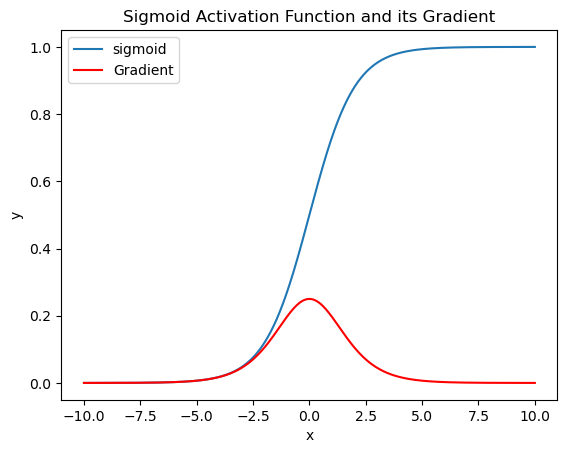

In [33]:
# your code here

import numpy as np
import matplotlib.pyplot as plt


def plot_sigmoid():
    x = torch.linspace(-10, 10, 1000, requires_grad=True)

    y = sigmoid_activation_function(x)
    y.backward(torch.ones_like(x))

    gradient = x.grad

    x = x.detach().numpy()
    y = y.detach().numpy()

    gradient = gradient.detach().numpy()

    fig, ax = plt.subplots()

    ax.plot(x, y, label='sigmoid')
    ax.plot(x, gradient, label='Gradient', color='red')
    ax.legend()

    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('Sigmoid Activation Function and its Gradient')

    plt.show()


plot_sigmoid()

Exercise 5. 

Write in python a function to plot the ReLU activation function and its gradient using matplotlib.

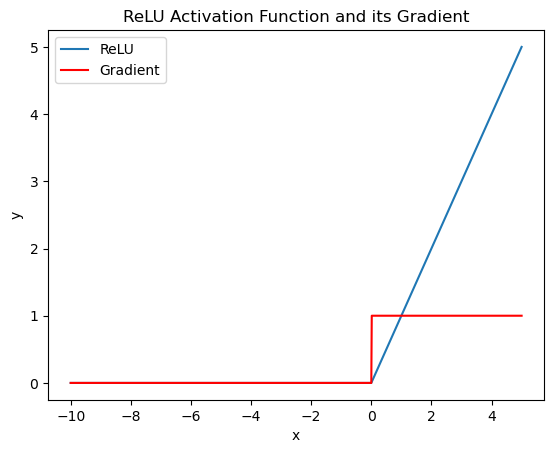

In [47]:
# your code here


def plot_relu():
    x = torch.linspace(-10, 5, 1000, requires_grad=True)

    y = torch.relu(x)
    y.backward(torch.ones_like(x))

    grad = x.grad

    x = x.detach().numpy()
    y = y.detach().numpy()

    grad = grad.detach().numpy()

    fig, ax = plt.subplots()

    ax.plot(x, y, label='ReLU')
    ax.plot(x, grad, label='Gradient', color='red')
    ax.legend()

    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('ReLU Activation Function and its Gradient')

    plt.show()


plot_relu()

Exercise 6. 

Write in python a function to plot the tanh activation function and its gradient using matplotlib.

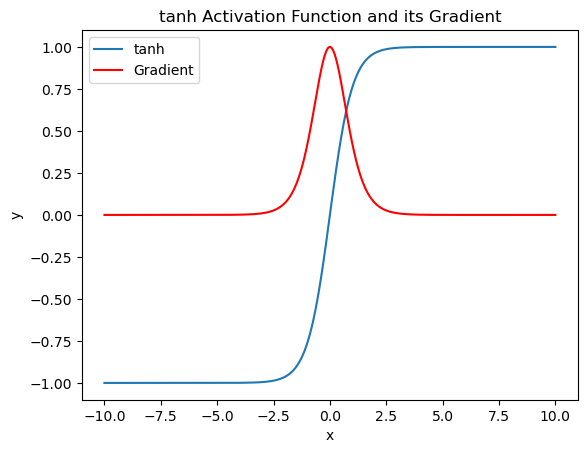

In [34]:
# your code here


def plot_tanh():
    x = torch.linspace(-10, 10, 1000, requires_grad=True)

    y = torch.nn.Tanh()
    y = y(x)
    y.backward(torch.ones_like(x))

    grad = x.grad

    x = x.detach().numpy()
    y = y.detach().numpy()

    grad = grad.detach().numpy()

    fig, ax = plt.subplots()

    ax.plot(x, y, label='tanh')
    ax.plot(x, grad, label='Gradient', color='red')
    ax.legend()

    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('tanh Activation Function and its Gradient')

    plt.show()


plot_tanh()

Exercise 7. 

Write in python a function to plot the softmax activation function

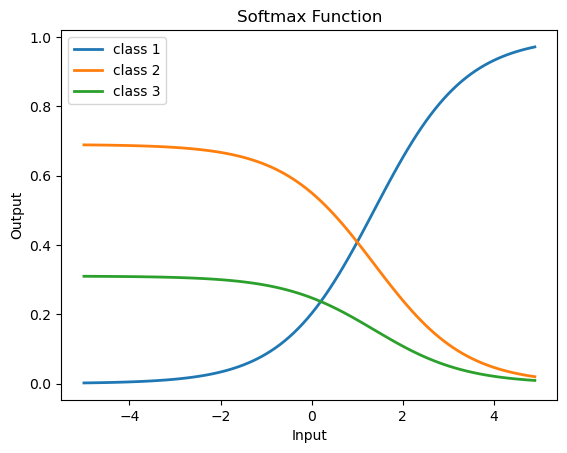

In [31]:
# your code here


def softmax_activation_function(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0)


def plot_softmax():
    x = np.arange(-5.0, 5.0, 0.1)
    scores = np.vstack([x, np.ones_like(x), 0.2 * np.ones_like(x)])

    plt.plot(x, softmax_activation_function(scores).T, linewidth=2)

    plt.xlabel('Input')
    plt.ylabel('Output')

    plt.title('Softmax Function')
    plt.legend(['class 1', 'class 2', 'class 3'], loc='best')

    plt.show()


plot_softmax()

Exercise 8. 

Write in python a function to plot the leaky ReLU activation function and its gradient using matplotlib.

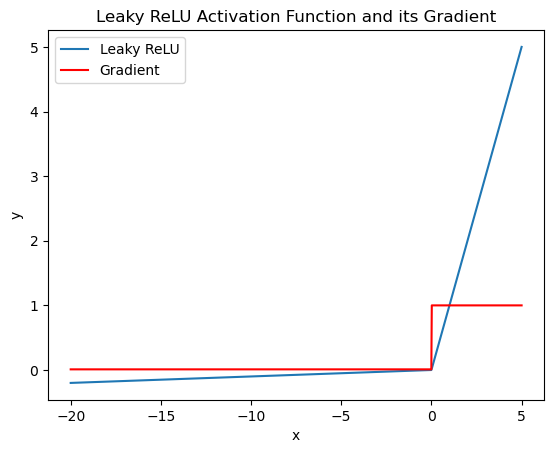

In [35]:
# your code here


def plot_leaky_relu():
    x = torch.linspace(-20, 5, 1000, requires_grad=True)

    y = torch.nn.LeakyReLU()
    y = y(x)
    y.backward(torch.ones_like(x))

    grad = x.grad

    x = x.detach().numpy()
    y = y.detach().numpy()

    grad = grad.detach().numpy()

    fig, ax = plt.subplots()

    ax.plot(x, y, label='Leaky ReLU')
    ax.plot(x, grad, label='Gradient', color='red')
    ax.legend()

    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('Leaky ReLU Activation Function and its Gradient')

    plt.show()


plot_leaky_relu()

## Perceptron

We define a class called *Perceptron* that inherits from *torch.nn.Module*. 

In the constructor, we define a single fully-connected linear layer with $input_dim$ inputs and $output_dim$ outputs, and a $sigmoid$ activation function. In the forward method, we apply the linear transformation to the input $x$, and then apply the sigmoid activation function to the output.



In [42]:
import torch
import torch.nn as nn

input_size = 2
output_size = 1

class Perceptron(torch.nn.Module):
    def __init__(self, input_dim, output_dim):
        super(Perceptron, self).__init__()
        self.linear = torch.nn.Linear(input_dim, output_dim)
        self.activation = torch.nn.Sigmoid()
        
    def forward(self, x):
        x = self.linear(x)
        x = self.activation(x)
        return x


 We create an instance of this model and use it to make predictions like this:

In [43]:
perceptron = Perceptron(input_size, output_size)
x = torch.tensor([0.5, 0.2])
y = perceptron(x)
print(y)


tensor([0.5318], grad_fn=<SigmoidBackward0>)


In [44]:
# Define the loss function and optimizer
criterion = nn.BCELoss()  # Binary cross-entropy loss
optimizer = torch.optim.SGD(perceptron.parameters(), lr=0.1)  # Stochastic gradient descent optimizer

# Generate some random input data and labels
input_data = torch.randn((10, input_size))
labels = torch.randint(0, 2, (10, output_size)).float()

# Train the model
num_epochs = 1000
for epoch in range(num_epochs):
    # Forward pass
    outputs = perceptron(input_data)
    loss = criterion(outputs, labels)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print the loss every 100 epochs
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [100/1000], Loss: 0.4422
Epoch [200/1000], Loss: 0.4061
Epoch [300/1000], Loss: 0.3972
Epoch [400/1000], Loss: 0.3945
Epoch [500/1000], Loss: 0.3936
Epoch [600/1000], Loss: 0.3932
Epoch [700/1000], Loss: 0.3931
Epoch [800/1000], Loss: 0.3930
Epoch [900/1000], Loss: 0.3930
Epoch [1000/1000], Loss: 0.3930


Exercise 9: 

Implement a binary classification model using the Perceptron class in PyTorch for the logic OR. 

Your task is to create a Perceptron instance and train it using a proper  dataset and the binary cross-entropy loss with stochastic gradient descent optimizer. 

Here are the steps you can follow:

Define a Perceptron class that inherits from torch.nn.Module and implements a binary classification model.

Define a binary cross-entropy loss function using the torch.nn.BCEWithLogitsLoss module.

Define a stochastic gradient descent optimizer using the torch.optim.SGD module.

Train the Perceptron model on the training set using the binary cross-entropy loss and stochastic gradient descent optimizer.

Evaluate the trained model compute the accuracy.


In [56]:
class Perceptron(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(Perceptron, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)

    def forward(self, x):
        x = self.linear(x)
        return x

input_size = 2
output_size = 1

model = Perceptron(input_size, output_size)

criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

data = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float)
labels = torch.tensor([[0], [1], [1], [1]], dtype=torch.float)

num_epochs = 1000
for epoch in range(num_epochs):
    outputs = model(data)
    loss = criterion(outputs, labels)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

outputs = model(data)
predicted_labels = torch.round(torch.sigmoid(outputs))

accuracy = torch.mean((predicted_labels == labels).float())

print(f"Accuracy is {accuracy.item():.2%}")

Epoch [100/1000], Loss: 0.3150
Epoch [200/1000], Loss: 0.2489
Epoch [300/1000], Loss: 0.2048
Epoch [400/1000], Loss: 0.1733
Epoch [500/1000], Loss: 0.1497
Epoch [600/1000], Loss: 0.1315
Epoch [700/1000], Loss: 0.1170
Epoch [800/1000], Loss: 0.1053
Epoch [900/1000], Loss: 0.0956
Epoch [1000/1000], Loss: 0.0875
Accuracy is 100.00%
